# Importing Useful Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Checking null values in the datasets

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
features = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=42,shuffle=True)

In [7]:
train_df = pd.DataFrame(x_train,columns=df.columns[:-1])
train_df['quality'] = y_train
print(train_df.shape)
train_df.head()

(1279, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
2,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
3,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
4,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5


In [8]:
test_df = pd.DataFrame(x_test,columns= df.columns[:-1])
test_df['quality'] = y_test
print(test_df.shape)
test_df.head()

(320, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


# Checking class imbalance in dataset

In [9]:
train_df.quality.value_counts()

5    551
6    506
7    157
4     43
8     13
3      9
Name: quality, dtype: int64

# Exploring Training Datasets

In [10]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.323690,0.530559,0.272471,2.555473,0.088448,15.876075,46.657154,0.996774,3.311650,0.660023,10.418100,5.623925
std,1.724243,0.179275,0.195448,1.435790,0.049332,10.313517,32.941962,0.001856,0.154016,0.174605,1.052694,0.806909
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,3.000000
25%,7.100000,0.400000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995655,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Finding Correlations in the data

In [11]:
train_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.242533,0.669197,0.116167,0.088058,-0.155080,-0.111576,0.660577,-0.676197,0.173066,-0.058827,0.122488
volatile acidity,-0.242533,1.000000,-0.545491,0.007461,0.065063,-0.002211,0.083318,0.032228,0.217903,-0.266083,-0.210254,-0.378372
citric acid,0.669197,-0.545491,1.000000,0.152596,0.221817,-0.067874,0.034224,0.367675,-0.540161,0.315754,0.106708,0.216115
residual sugar,0.116167,0.007461,0.152596,1.000000,0.063500,0.167828,0.162079,0.377377,-0.076215,0.009121,0.042239,0.005425
chlorides,0.088058,0.065063,0.221817,0.063500,1.000000,0.012782,0.046437,0.185999,-0.268871,0.381678,-0.213184,-0.126541
free sulfur dioxide,-0.155080,-0.002211,-0.067874,0.167828,0.012782,1.000000,0.668166,-0.021194,0.066672,0.061942,-0.083883,-0.055860
total sulfur dioxide,-0.111576,0.083318,0.034224,0.162079,0.046437,0.668166,1.000000,0.075224,-0.070382,0.050056,-0.227074,-0.200067
density,0.660577,0.032228,0.367675,0.377377,0.185999,-0.021194,0.075224,1.000000,-0.332869,0.133472,-0.480249,-0.167091
pH,-0.676197,0.217903,-0.540161,-0.076215,-0.268871,0.066672,-0.070382,-0.332869,1.000000,-0.211560,0.217202,-0.045185
sulphates,0.173066,-0.266083,0.315754,0.009121,0.381678,0.061942,0.050056,0.133472,-0.211560,1.000000,0.097721,0.242596


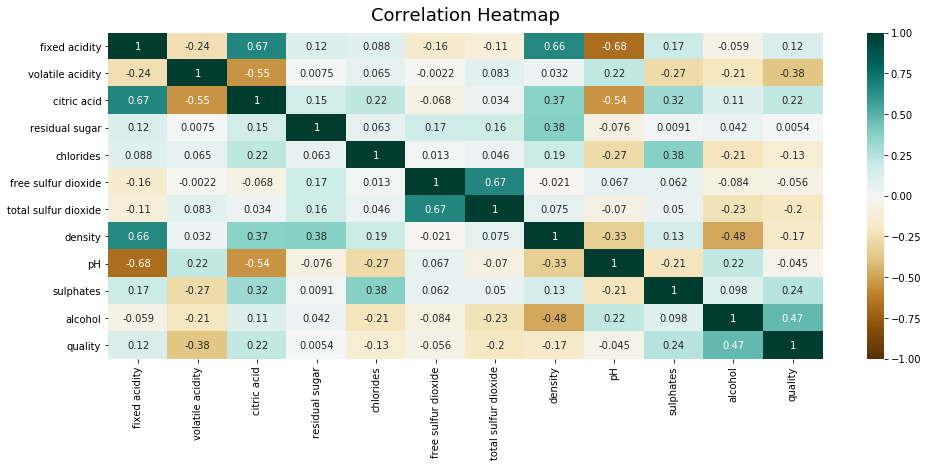

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Detecting outliers

In [13]:
train_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Fixed Acidity

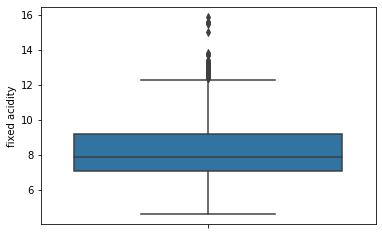

In [14]:
sns.boxplot(y=train_df['fixed acidity'])

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


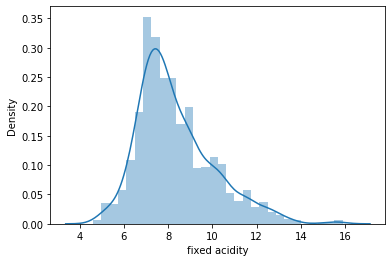

In [15]:
sns.distplot(train_df['fixed acidity'])

In [16]:
from scipy.stats import norm
from scipy.stats import shapiro
my_data = norm.rvs(train_df['fixed acidity'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

3.1473350401572953e-12
(0.9802182912826538, 3.1473350401572953e-12)


In [17]:
IQR = train_df["fixed acidity"].quantile(0.75) - train_df["fixed acidity"].quantile(0.25) 
print(IQR)

2.0999999999999996


In [18]:
lower_range = train_df["fixed acidity"].quantile(0.25) - (IQR * 3)
higher_range = train_df["fixed acidity"].quantile(0.75) + (IQR*3)
print(lower_range)
print(higher_range)

0.8000000000000007
15.499999999999998


In [19]:
train_df[(train_df["fixed acidity"] <= lower_range) | (train_df["fixed acidity"] >= higher_range)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
368,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
620,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
689,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
711,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5


#### Replacing the value of outliers greater than higher range with the value of higher range

In [20]:
train_df.loc[train_df["fixed acidity"] >= higher_range,"fixed acidity"] = higher_range

### Volatile Acidity column

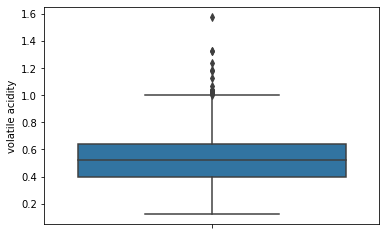

In [21]:
sns.boxplot(y=train_df['volatile acidity'])

In [22]:
my_data = norm.rvs(train_df['volatile acidity'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

0.5627643465995789
(0.9988105297088623, 0.5627643465995789)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


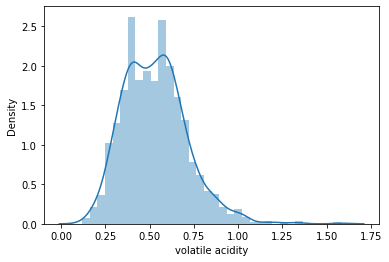

In [23]:
sns.distplot(train_df['volatile acidity'])

In [24]:
upper_limit = train_df["volatile acidity"].mean() + 3 * train_df["volatile acidity"].std()
lower_limit = train_df["volatile acidity"].mean() - 3 * train_df["volatile acidity"].std()
print(upper_limit)
print(lower_limit)

1.0683847607707733
-0.00726669978562855


In [25]:
train_df.loc[(train_df["volatile acidity"] <= lower_limit) | (train_df["volatile acidity"] >= upper_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
193,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
206,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
292,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
444,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
559,8.0,1.180,0.21,1.90,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,5
713,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
800,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
931,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5


In [26]:
train_df.loc[train_df["volatile acidity"] >= upper_limit,"volatile acidity"] = upper_limit

In [27]:
# IQR = train_df["volatile acidity"].quantile(0.75) - train_df["volatile acidity"].quantile(0.25) 
# print(IQR)

In [28]:
# lower_range = train_df["volatile acidity"].quantile(0.25) - (IQR * 1.5)
# higher_range = train_df["volatile acidity"].quantile(0.75) + (IQR*1.5)
# print(lower_range)
# print(higher_range)

In [29]:
# train_df[(train_df["volatile acidity"] <= lower_range) | (df["volatile acidity"] >= higher_range)]

# Citric Acid

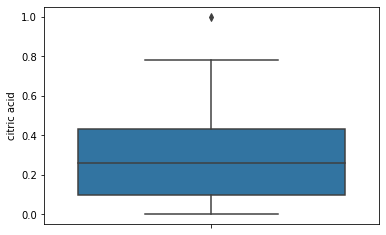

In [30]:
sns.boxplot(y=train_df['citric acid'])

In [31]:
my_data = norm.rvs(train_df['citric acid'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

0.9060793519020081
(0.999251663684845, 0.9060793519020081)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


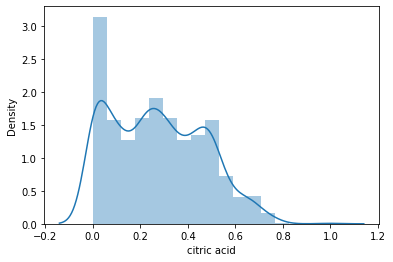

In [32]:
sns.distplot(train_df['citric acid'])

In [33]:
upper_limit = train_df["citric acid"].mean() + 3 * train_df["citric acid"].std()
lower_limit = train_df["citric acid"].mean() - 3 * train_df["citric acid"].std()
print(lower_limit)
print(upper_limit)

-0.31387268317177236
0.8588140436096143


In [34]:
train_df[(train_df["citric acid"] <= lower_limit) | (train_df["citric acid"] >= upper_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1005,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [35]:
train_df.loc[train_df["citric acid"] >= upper_limit,"citric acid"] = upper_limit

In [36]:
# IQR = df["citric acid"].quantile(0.75) - df["citric acid"].quantile(0.25) 
# print(IQR)

In [37]:
# lower_range = df["citric acid"].quantile(0.25) - (IQR * 1.5)
# higher_range = df["citric acid"].quantile(0.75) + (IQR* 1.5)
# print(lower_range)
# print(higher_range)

In [38]:
# df[(df["citric acid"] <= lower_range) | (df["citric acid"] >= higher_range)]

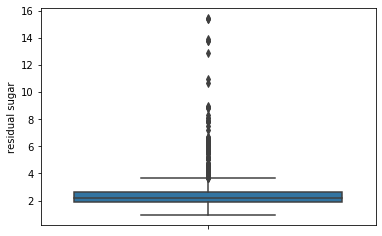

In [39]:
sns.boxplot(y=train_df['residual sugar'])

In [40]:
my_data = norm.rvs(train_df['residual sugar'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

8.281409932981455e-35
(0.8300900459289551, 8.281409932981455e-35)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


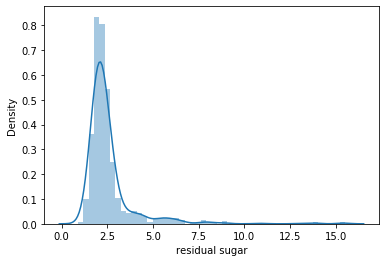

In [41]:
sns.distplot(train_df['residual sugar'])

In [42]:
IQR = train_df["residual sugar"].quantile(0.75) - train_df["residual sugar"].quantile(0.25) 
print(IQR)

0.7000000000000002


In [43]:
lower_range = train_df["residual sugar"].quantile(0.25) - (IQR * 3)
higher_range = train_df["residual sugar"].quantile(0.75) + (IQR*3)
print(lower_range)
print(higher_range)

-0.20000000000000062
4.700000000000001


In [44]:
train_df[(train_df["residual sugar"] <= lower_range) | (train_df["residual sugar"] >= 9)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
33,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
196,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4
327,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
377,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
506,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
549,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
827,9.1,0.280,0.46,9.0,0.114,3.0,9.0,0.99901,3.18,0.60,10.9,6
912,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
956,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1104,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5


In [45]:
train_df.loc[train_df["residual sugar"] >= 9,"residual sugar"] = 9

## Chlorides column

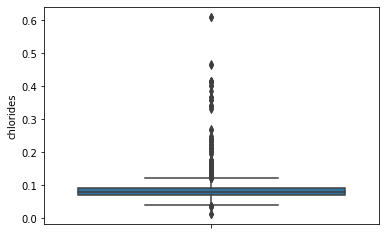

In [46]:
sns.boxplot(y = train_df['chlorides'])

In [47]:
my_data = norm.rvs(train_df['chlorides'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

0.17444194853305817
(0.998157262802124, 0.17444194853305817)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


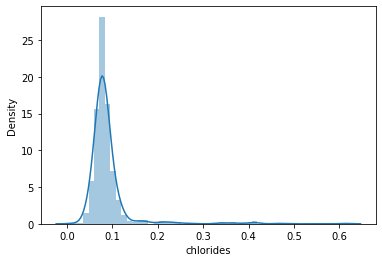

In [48]:
sns.distplot(train_df['chlorides'])

In [49]:
upper_limit = train_df["chlorides"].mean() + 3 * train_df["chlorides"].std()
lower_limit = train_df["chlorides"].mean() - 3 * train_df["chlorides"].std()
print(lower_limit)
print(upper_limit)

-0.05954924087443948
0.23644525338421163


In [50]:
train_df[(train_df["chlorides"] <= lower_limit) | (train_df["chlorides"] >= upper_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
44,7.8,0.430,0.700000,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
89,8.6,0.635,0.680000,1.8,0.403,19.0,56.0,0.99632,3.02,1.15,9.3,5
129,7.8,0.480,0.680000,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6
140,7.3,0.670,0.260000,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
142,8.5,0.440,0.500000,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5
194,8.9,0.610,0.490000,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,5
197,6.9,0.635,0.170000,2.4,0.241,6.0,18.0,0.99610,3.40,0.59,10.3,6
215,9.5,0.550,0.660000,2.3,0.387,12.0,37.0,0.99820,3.17,0.67,9.6,5
224,11.0,0.200,0.480000,2.0,0.343,6.0,18.0,0.99790,3.30,0.71,10.5,5
241,9.1,0.760,0.680000,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6


In [51]:
train_df.loc[train_df["chlorides"] >= upper_limit,"chlorides"] = upper_limit

In [52]:
# IQR = df["chlorides"].quantile(0.75) - df["chlorides"].quantile(0.25) 
# print(IQR)

In [53]:
# lower_range = df["chlorides"].quantile(0.25) - (IQR * 1.5)
# higher_range = df["chlorides"].quantile(0.75) + (IQR* 1.5)
# print(lower_range)
# print(higher_range)

In [54]:
# df[(df["chlorides"] <= lower_range) | (df["chlorides"] >= higher_range)]

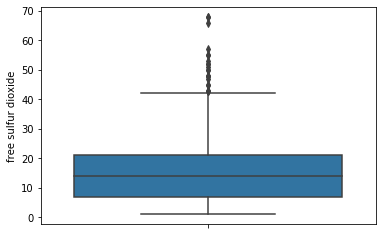

In [55]:
sns.boxplot(y=train_df['free sulfur dioxide'])

In [56]:
my_data = norm.rvs(train_df['free sulfur dioxide'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

1.2237029147430018e-26
(0.9115519523620605, 1.2237029147430018e-26)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


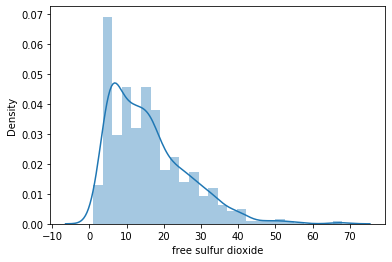

In [57]:
sns.distplot(train_df['free sulfur dioxide'])

In [58]:
IQR = train_df["free sulfur dioxide"].quantile(0.75) - train_df["free sulfur dioxide"].quantile(0.25) 
print(IQR)

14.0


In [59]:
lower_range = train_df["free sulfur dioxide"].quantile(0.25) - (IQR * 3)
higher_range = train_df["free sulfur dioxide"].quantile(0.75) + (IQR*3)
print(lower_range)
print(higher_range)

-35.0
63.0


In [60]:
train_df[(train_df["free sulfur dioxide"] <= lower_range) | (train_df["free sulfur dioxide"] >= higher_range)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
797,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1057,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
1099,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5


#### Replacing outlier

In [61]:
train_df.loc[(train_df["free sulfur dioxide"] >= higher_range),"free sulfur dioxide"] = higher_range

## Total sulfur dioxide column

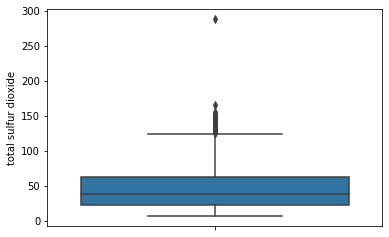

In [62]:
sns.boxplot(y=train_df['total sulfur dioxide'])

In [63]:
my_data = norm.rvs(train_df['total sulfur dioxide'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

2.5611503525320443e-30
(0.8799550533294678, 2.5611503525320443e-30)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


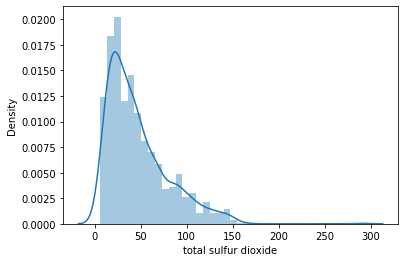

In [64]:
sns.distplot(train_df['total sulfur dioxide'])

In [65]:
IQR = train_df["total sulfur dioxide"].quantile(0.75) - train_df["total sulfur dioxide"].quantile(0.25) 
print(IQR)

41.0


In [66]:
lower_range = train_df["total sulfur dioxide"].quantile(0.25) - (IQR * 3)
higher_range = train_df["total sulfur dioxide"].quantile(0.75) + (IQR*3)
print(lower_range)
print(higher_range)

-101.0
186.0


In [67]:
train_df[(train_df["total sulfur dioxide"] <= lower_range) | (train_df["total sulfur dioxide"] >= higher_range)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
859,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


#### Replacing outliers

In [68]:
train_df.loc[train_df["total sulfur dioxide"] >= higher_range,"total sulfur dioxide"] = higher_range

## Density column

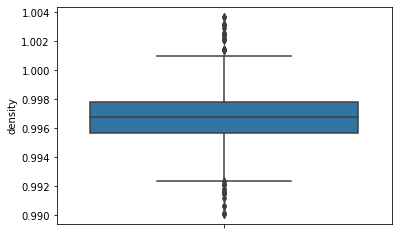

In [69]:
sns.boxplot(y=train_df['density'])

In [70]:
my_data = norm.rvs(train_df['density'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

0.7812743186950684
(0.9990711212158203, 0.7812743186950684)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


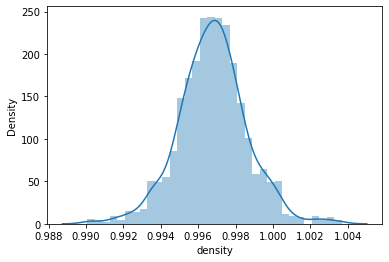

In [71]:
sns.distplot(train_df['density'])

In [72]:
upper_limit = train_df["density"].mean() + 3 * train_df["density"].std()
lower_limit = train_df["density"].mean() - 3 * train_df["density"].std()
print(upper_limit)
print(lower_limit)

1.002341804014372
0.9912061553288626


In [73]:
train_df[(train_df["density"] <= lower_limit) | (train_df["density"] >= upper_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
33,10.2,0.540,0.37,9.0,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
267,10.7,0.900,0.34,6.6,0.112,23.0,99.0,1.00289,3.22,0.68,9.3,5
368,15.5,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
377,9.9,0.500,0.50,9.0,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
395,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
492,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
506,10.6,0.280,0.39,9.0,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
620,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
689,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


In [74]:
train_df.loc[train_df["density"] <= lower_limit,"density"] = lower_limit
train_df.loc[train_df["density"] >= upper_limit,"density"] = upper_limit

# pH column

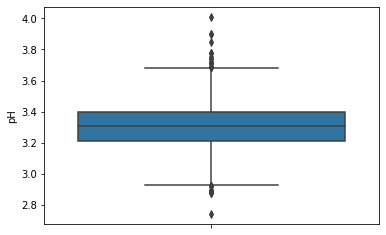

In [75]:
sns.boxplot(y=train_df['pH'])

In [76]:
my_data = norm.rvs(train_df['pH'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

0.14909321069717407
(0.9980793595314026, 0.14909321069717407)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


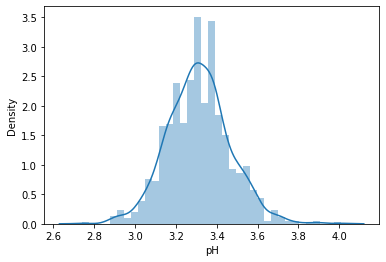

In [77]:
sns.distplot(train_df['pH'])

In [78]:
upper_limit = train_df["pH"].mean() + 3 * train_df["pH"].std()
lower_limit = train_df["pH"].mean() - 3 * train_df["pH"].std()
print(upper_limit)
print(lower_limit)

3.7736967567380164
2.8496026959593994


In [79]:
train_df[(train_df["pH"] <= lower_limit) | (train_df["pH"] >= upper_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
74,5.4,0.420,0.270000,2.00,0.092000,23.0,55.0,0.99471,3.78,0.64,12.3,7
451,4.6,0.520,0.150000,2.10,0.054000,8.0,65.0,0.99340,3.90,0.56,13.1,4
473,5.1,0.470,0.020000,1.30,0.034000,18.0,44.0,0.99210,3.90,0.62,12.8,6
984,5.2,0.645,0.000000,2.15,0.080000,15.0,28.0,0.99444,3.78,0.61,12.5,6
1005,9.2,0.520,0.858814,3.40,0.236445,32.0,69.0,0.99960,2.74,2.00,9.4,4
1027,5.0,0.740,0.000000,1.20,0.041000,16.0,46.0,0.99258,4.01,0.59,12.5,6
1122,4.7,0.600,0.170000,2.30,0.058000,17.0,106.0,0.99320,3.85,0.60,12.9,6


In [80]:
train_df.loc[train_df["pH"] <= lower_limit,"pH"] = lower_limit
train_df.loc[train_df["pH"] >= upper_limit,"pH"] = upper_limit

## Sulphates column

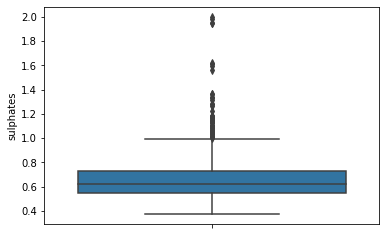

In [81]:
sns.boxplot(y=train_df['sulphates'])

In [82]:
my_data = norm.rvs(train_df['sulphates'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

0.8375261425971985
(0.9991452097892761, 0.8375261425971985)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


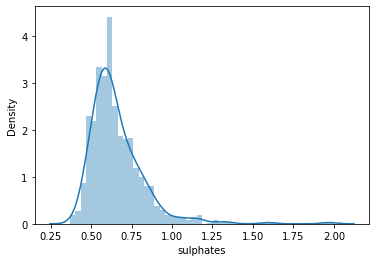

In [83]:
sns.distplot(train_df['sulphates'])

In [84]:
upper_limit = train_df["sulphates"].mean() + 3 * train_df["sulphates"].std()
lower_limit = train_df["sulphates"].mean() - 3 * train_df["sulphates"].std()
print(upper_limit)
print(lower_limit)

1.1838373359006362
0.13620957574908876


In [85]:
train_df[(train_df["sulphates"] <= lower_limit) | (train_df["sulphates"] >= upper_limit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,12.5,0.280,0.540000,2.3,0.082000,12.0,29.0,0.99970,3.110000,1.36,9.8,7
44,7.8,0.430,0.700000,1.9,0.236445,22.0,67.0,0.99740,3.130000,1.28,9.4,5
88,8.6,0.490,0.280000,1.9,0.110000,20.0,136.0,0.99720,2.930000,1.95,9.9,6
241,9.1,0.760,0.680000,1.7,0.236445,18.0,64.0,0.99652,2.900000,1.33,9.1,6
273,9.3,0.390,0.440000,2.1,0.107000,34.0,125.0,0.99780,3.140000,1.22,9.5,5
439,7.8,0.410,0.680000,1.7,0.236445,18.0,69.0,0.99730,3.080000,1.31,9.3,5
468,8.6,0.490,0.290000,2.0,0.110000,19.0,133.0,0.99720,2.930000,1.98,9.8,5
626,7.1,0.310,0.300000,2.2,0.053000,36.0,127.0,0.99650,2.940000,1.62,9.5,5
660,7.7,0.410,0.760000,1.8,0.236445,8.0,45.0,0.99680,3.060000,1.26,9.4,5
675,8.9,0.590,0.500000,2.0,0.236445,27.0,81.0,0.99640,3.040000,1.61,9.5,6


In [86]:
train_df.loc[train_df["sulphates"] >= upper_limit,"sulphates"] = upper_limit

## Alcohol column

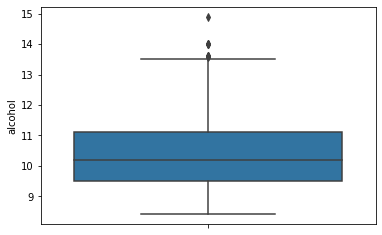

In [87]:
sns.boxplot(y=train_df['alcohol'])

In [88]:
my_data = norm.rvs(train_df['alcohol'])
test = shapiro(my_data)
(test_statistics,pvalue) = test
print(pvalue)
print(test)

4.785949272445578e-07
(0.9910107851028442, 4.785949272445578e-07)


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


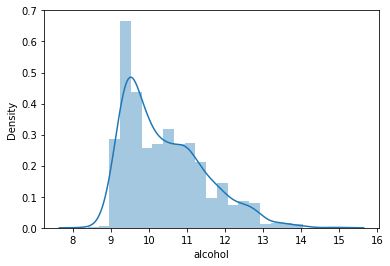

In [89]:
sns.distplot(train_df['alcohol'])

In [90]:
IQR = train_df["alcohol"].quantile(0.75) - train_df["alcohol"].quantile(0.25) 
print(IQR)

1.5999999999999996


In [91]:
lower_range = train_df["alcohol"].quantile(0.25) - (IQR * 3)
higher_range = train_df["alcohol"].quantile(0.75) + (IQR*3)
print(lower_range)
print(higher_range)

4.700000000000001
15.899999999999999


In [92]:
train_df[(train_df["alcohol"] <= lower_range) | (train_df["alcohol"] >= higher_range)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


## Model Building

### There is class imbalance in the datasets so we convert this problem into a binary classification problem such that the wine with quality greater than 6 is considered as a good quality wine where as wine with quality lesser than 6 is considered as a bad quality wine.

In [154]:
# Create Classification version of target variable
train_df['goodquality'] = [1 if x > 6 else 0 for x in train_df['quality']]
test_df['goodquality'] = [1 if x> 6 else 0 for x in test_df['quality']]

In [155]:
# Separate feature variables and target variable
x_train = train_df.drop(['quality','goodquality'], axis = 1).values
y_train = train_df['goodquality'].values
x_test = test_df.drop(['quality','goodquality'], axis = 1).values
y_test = test_df['goodquality'].values

In [156]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold,GridSearchCV

In [157]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [158]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[262  11]
 [ 23  24]]
0.89375
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.51      0.59        47

    accuracy                           0.89       320
   macro avg       0.80      0.74      0.76       320
weighted avg       0.88      0.89      0.89       320



In [159]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Feature: 0, Score: 0.07240
Feature: 1, Score: 0.11825
Feature: 2, Score: 0.09100
Feature: 3, Score: 0.06426
Feature: 4, Score: 0.07403
Feature: 5, Score: 0.05843
Feature: 6, Score: 0.08405
Feature: 7, Score: 0.09334
Feature: 8, Score: 0.05899
Feature: 9, Score: 0.12148
Feature: 10, Score: 0.16377


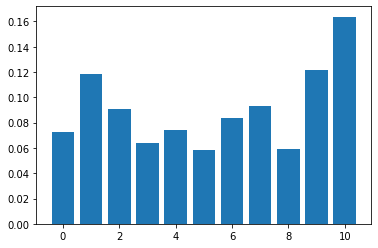

In [160]:
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [161]:
clf = AdaBoostClassifier(n_estimators=1000)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


In [162]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[257  16]
 [ 18  29]]
0.89375
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.64      0.62      0.63        47

    accuracy                           0.89       320
   macro avg       0.79      0.78      0.78       320
weighted avg       0.89      0.89      0.89       320



In [163]:
clf = GradientBoostingClassifier(n_estimators=1000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [164]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[261  12]
 [ 21  26]]
0.896875
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.68      0.55      0.61        47

    accuracy                           0.90       320
   macro avg       0.80      0.75      0.78       320
weighted avg       0.89      0.90      0.89       320



In [165]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))

  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {} \n".format(sum(y_train_res == 1)))

Before OverSampling, counts of label '0': 1109
Before OverSampling, counts of label '1': 170 

After OverSampling, the shape of train_X: (2218, 11)
After OverSampling, the shape of train_y: (2218,) 

After OverSampling, counts of label '0': 1109
After OverSampling, counts of label '1': 1109 



In [166]:
clf = AdaBoostClassifier(n_estimators=1000)
clf.fit(X_train_res,y_train_res)
y_pred = clf.predict(x_test)

In [167]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[249  24]
 [ 17  30]]
0.871875
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       273
           1       0.56      0.64      0.59        47

    accuracy                           0.87       320
   macro avg       0.75      0.78      0.76       320
weighted avg       0.88      0.87      0.88       320



In [168]:
clf = GradientBoostingClassifier(n_estimators=1000)
clf.fit(X_train_res,y_train_res)
y_pred = clf.predict(x_test)

In [169]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[253  20]
 [ 14  33]]
0.89375
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       273
           1       0.62      0.70      0.66        47

    accuracy                           0.89       320
   macro avg       0.79      0.81      0.80       320
weighted avg       0.90      0.89      0.90       320



In [174]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_res,y_train_res)

y_pred=clf.predict(x_test)

In [175]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[250  23]
 [  8  39]]
0.903125
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       273
           1       0.63      0.83      0.72        47

    accuracy                           0.90       320
   macro avg       0.80      0.87      0.83       320
weighted avg       0.92      0.90      0.91       320



In [176]:
import pickle
# save the model to disk
pickle.dump(clf, open('wine_quality_rfclassifier.pickle', 'wb'))

**<h4>Deploying model to production</h4>**

In [177]:
clf.predict([[7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6]])

array([0], dtype=int64)

In [179]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.323221,0.529388,0.272360,2.523104,0.085646,15.865911,46.576622,0.996772,3.311284,0.655430,10.418100,5.623925,0.132916
std,1.722247,0.174697,0.195076,1.213925,0.032013,10.264680,32.471596,0.001828,0.152122,0.151876,1.052694,0.806909,0.339617
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.991206,2.849603,0.370000,8.400000,3.000000,0.000000
25%,7.100000,0.400000,0.100000,1.900000,0.071000,7.000000,22.000000,0.995655,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997845,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.500000,1.068385,0.858814,9.000000,0.236445,63.000000,186.000000,1.002342,3.773697,1.183837,14.900000,8.000000,1.000000


In [180]:
test_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,8.303438,0.516875,0.265000,2.472187,0.083544,15.870313,45.710938,0.996638,3.308969,0.650656,10.442500,5.684375,0.146875
std,1.809576,0.178054,0.192382,1.301431,0.036431,11.043639,32.748663,0.002007,0.156084,0.147393,1.117511,0.809663,0.354536
min,5.000000,0.120000,0.000000,1.200000,0.039000,1.000000,7.000000,0.990800,2.860000,0.330000,8.400000,3.000000,0.000000
25%,7.075000,0.370000,0.080000,1.900000,0.068000,8.000000,23.000000,0.995457,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.078000,13.000000,37.000000,0.996500,3.320000,0.610000,10.100000,6.000000,0.000000
75%,9.225000,0.636250,0.410000,2.562500,0.088000,21.500000,60.000000,0.997680,3.400000,0.740000,11.200000,6.000000,0.000000
max,15.500000,1.115000,0.790000,13.400000,0.422000,72.000000,278.000000,1.003150,4.010000,1.360000,14.000000,8.000000,1.000000
